#### Watson Tone Analyzer "Hello World" Demo

This python notebook migrates the Watson Tone Analyzer Hello World Example from [The Watson Developer Cloud Docs](https://www.ibm.com/smarterplanet/us/en/ibmwatson/developercloud/tone-analyzer/api/v3/?curl#introduction) to a Python Notebook. This is divided into two sections:

* Use of Python SDK
* Use of REST API through HTTP requests

Although the Python SDK is constantly evolving, one can always revert to raw HTTP requests. This notebook can show how. 

##### Python SDK

This is basically copied/pasted from Watson Developer Cloud docs. The demo analyzes a quote form Emily Dickinson.

In [143]:
import json
import requests
from watson_developer_cloud import ToneAnalyzerV3
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

In [144]:
%matplotlib inline

Create a Tone Analyzer object, with the appropriate credentials. 

In [145]:
def analyze_tone(speech):
    uname='167ddf42-76ff-414c-9291-a667ba4651a5'
    passwd='CCvOpvbi1hRo'
    tone_analyzer = ToneAnalyzerV3(
       username=uname,
       password=passwd,
       version='2016-09-21')
    result=tone_analyzer.tone(text=speech)
    return result

In [146]:
def analyze_personality(speech):
    uname='bc34d50e-eff8-442b-83ce-2e4ef2d4ac0b'
    passwd='0L55PVREmGV1'
    params={'version':'2016-09-30'}
    data={'contentItems': [{'content':speech}]}
    r=requests.post('https://gateway.watsonplatform.net/personality-insights/api/v2/profile',params=params,json=data,auth=(uname,passwd))
    return r

In [147]:
def plot_tones(tone,tone_category):
    width=0.5
    tones=tone['document_tone']['tone_categories'][tone_category]['tones']
    x=np.arange(len(tones))

    scores=[tones[i]['score'] for i in np.arange(len(tones))]
    tone_type=[tones[i]['tone_name'] for i in np.arange(len(tones))]

    fig,ax1=plt.subplots(figsize=(10,7))

    ax1.bar(x,scores,width)
    ax1.set_xticks(x+width/2)
    ax1.set_xticklabels(tone_type)
    ax1.set_ylim(0,1)
    plt.show()

In [148]:
def plot_tones(speaker_tones,speaker_names,tone_category):
    width=0.5
    tones=[]
    scores=[]
    length1=len(speaker_tones[0]['document_tone']['tone_categories'][tone_category]['tones'])
    plots=[]
    x=np.arange(len(speaker_names))
    y_offset=np.array([0.0] * len(speaker_names))
    fig,ax1=plt.subplots(figsize=(10,7))
  
    #scores.append([speaker_tones[j]['document_tone']['tone_categories'][tone_category]['tones'][0]['score'] for j in np.arange(len(speaker_names))])
    tone_types=[speaker_tones[0]['document_tone']['tone_categories'][tone_category]['tones'][j]['tone_name'] for j in np.arange((length1))]
  
    for i in np.arange(0,length1):        
        scores.append([speaker_tones[j]['document_tone']['tone_categories'][tone_category]['tones'][i]['score'] for j in np.arange(len(speaker_names))])
        plots.append(ax1.bar(x,scores[i],width,bottom=y_offset,color=plt.rcParams['axes.color_cycle'][i]))
        y_offset=y_offset+scores[i]

    
    print len(plots)

    ax1.set_xticks(x+width/2)
    ax1.set_xticklabels(speaker_names)
    
    ax1.set_ylim(0,3.0)
    plt.legend(tuple(plots), tuple(tone_types),loc='upper right')
    plt.show()

In [149]:
def sort_by_percentage(d):
    return d['percentage']

In [150]:
def plot_personality(personality,personality_category):
    width=0.5
    traits=personality["tree"]["children"][personality_category]["children"][0]['children']
    traits.sort(key=sort_by_percentage,reverse=True)
    length=len(traits)
    if length > 6:
        length=6
    #traits=[[i]['name'] for i in np.arange(length)
    #tones=tone['document_tone']['tone_categories'][tone_category]['tones']
    x=np.arange(length)
    
    scores=[traits[i]['percentage'] for i in np.arange(length)]
    trait_type=[traits[i]['name'] for i in np.arange(length)]
    #for i in np.arange(len(traits)):
     #   print trait_type
    fig,ax1=plt.subplots(figsize=(12,7))

    ax1.bar(x,scores,width)
    ax1.set_xticks(x+width/2)
    ax1.set_xticklabels(trait_type)
    ax1.set_ylim(0,1)
    plt.show()

In [151]:
speaker_list=['obama.txt','michelle_obama.txt','chelsea_clinton.txt','bernie.txt']
#speaker_list=['melania_trump.txt','ivanka_trump.txt','guliani.txt','cruz.txt']

tones=[]
for speaker in speaker_list:
    file=open(speaker,'r')
    speech=file.read()
    tone=analyze_tone(speech)
    tones.append(tone)


In [152]:
#tone=analyze_tone(speech)
#print(json.dumps(tones[0],indent=2))



5


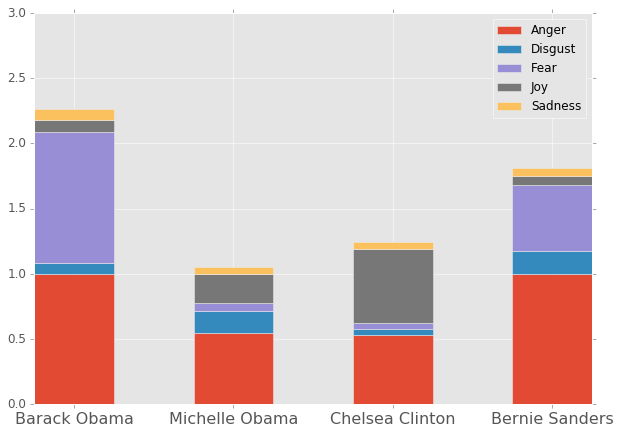

3


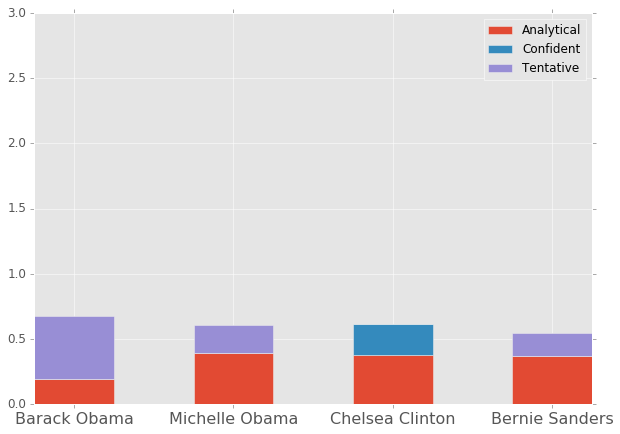

5


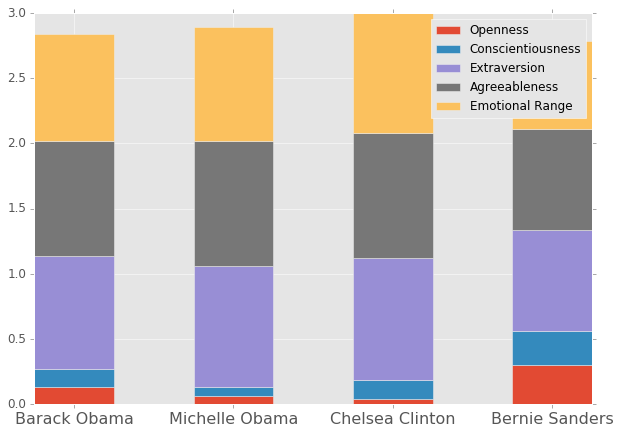

In [153]:
#print(emily_tone['document_tone']['tone_categories'][2])
speaker_names=["Barack Obama","Michelle Obama","Chelsea Clinton","Bernie Sanders"]
#speaker_names=["Melania Trump","Ivanka Trump","Rudy Guliani","Ted Cruz"]

plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=12
# first, emotional tone. Next language tone. Finally, social tone.
for i in np.arange(3):
    plot_tones(tones,speaker_names,i)
